# Dataset Link

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv(r'F:\Masters\Methods of Prediction\Projects\Milk Grade Predictions\archive\milknew.csv')

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
data.describe

<bound method NDFrame.describe of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [7]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
data ['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [9]:
data ['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [10]:
le = LabelEncoder()
data['Grade'] = le.fit_transform (data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

In [11]:
y = data["Grade"]
x = data.drop('Grade', axis = 1)
x_learn, x_eval, y_learn, y_eval = train_test_split(x, y, test_size=0.25, random_state=42)

# Applying ML Algorithms

## Naive Bayes 

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_learn,y_learn)
nbpred = nb.predict(x_eval)
nb_conf_matrix = confusion_matrix(y_eval, nbpred)
nb_acc_score = accuracy_score(y_eval, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_eval,nbpred))

confussion matrix
[[54  0  9]
 [ 5 93  1]
 [ 8  0 95]]


Accuracy of Naive Bayes model: 91.32075471698113 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        63
           1       1.00      0.94      0.97        99
           2       0.90      0.92      0.91       103

    accuracy                           0.91       265
   macro avg       0.90      0.91      0.90       265
weighted avg       0.92      0.91      0.91       265



## Random Forest Classifier 

In [14]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter Tuning 

In [15]:
ranf = RandomForestClassifier() 
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(ranf, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
nan
RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=200)
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


### Training RF after Hyperparameter Tuning 

<AxesSubplot:>

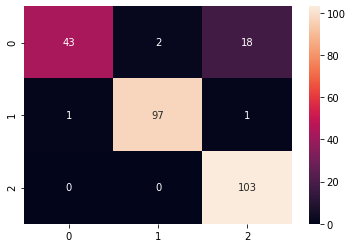

In [16]:
ranf =RandomForestClassifier(criterion='gini', max_depth=4, max_features='auto',
                       n_estimators=200)
ranf.fit(x_learn, y_learn)
y_predict_ranf = ranf.predict(x_eval)

# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_ranf)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of RF

In [17]:
print('Accuracy',accuracy_score((y_eval), y_predict_ranf) * 100)
print('Precision',precision_score(y_eval, y_predict_ranf, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_ranf, average='macro') * 100)

Accuracy 91.69811320754717
Precision 93.37776673842248
Recall 88.74458874458875


## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

### Hyperparameter Tuning 

In [19]:
params = {'n_neighbors':range(1,20),"metric":["euclidean", "manhattan"],
              'algorithm' :['ball_tree','kd_tree','brute']
        
             }
knn=KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
nan
KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=1)
{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 1}


### Training Knn after Hypreparameter Tuning 

<AxesSubplot:>

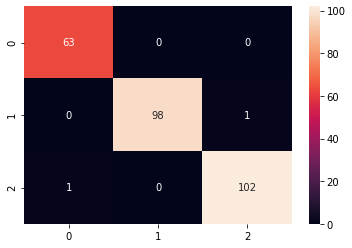

In [20]:
knn = KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=1)
knn.fit(x_learn, y_learn)
y_predict_knn = knn.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_knn)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of Knn

In [21]:
print('Accuracy',accuracy_score((y_eval), y_predict_knn)* 100)
print('Precision',precision_score(y_eval, y_predict_knn, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_knn, average='macro') * 100)

Accuracy 99.24528301886792
Precision 99.15554207119742
Recall 99.33967506783041


## Decision Tree Classifier 

In [22]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter Tuning 

In [23]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_learn, y_learn)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [24]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=1024)

### Training DTC after Hyperparameter Tuning 

<AxesSubplot:>

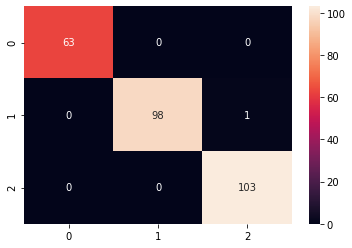

In [25]:
dtree =DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', max_depth=8,
                       max_features='auto', random_state=1024)
dtree.fit(x_learn, y_learn)
y_predict_dtree = dtree.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_dtree)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of DTC

In [26]:
print('Accuracy',accuracy_score((y_eval), y_predict_dtree) * 100)
print('Precision',precision_score(y_eval, y_predict_dtree, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_dtree, average='macro') * 100)

Accuracy 99.62264150943396
Precision 99.67948717948718
Recall 99.66329966329967


## Support Vector Classifier 

In [27]:
from sklearn.svm import SVC

### Hyperparameter Tuning 

In [28]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_learn, y_learn)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.585 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


### Training SVC after Hyperparameter Tuning 

<AxesSubplot:>

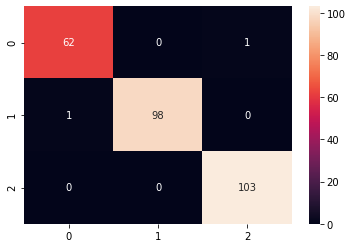

In [30]:
svc = SVC(kernel = 'rbf', C = 1000, gamma = 0.01)
svc.fit (x_learn, y_learn)
y_predict_svc = svc.predict (x_eval)

cm = confusion_matrix(y_eval, y_predict_svc)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of SVC

In [31]:
print('Accuracy',accuracy_score((y_eval), y_predict_svc) * 100)
print('Precision',precision_score(y_eval, y_predict_svc, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_svc, average='macro') * 100)

Accuracy 99.24528301886792
Precision 99.15038665038665
Recall 99.13419913419914


## MLP Classifier

In [40]:
from sklearn.neural_network import MLPClassifier

### Hyperparameter Tuning

In [41]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [43]:
grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5)
grid.fit(x_learn, y_learn)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}


### Training MLP after Hyperparameter Tuning 

<AxesSubplot:>

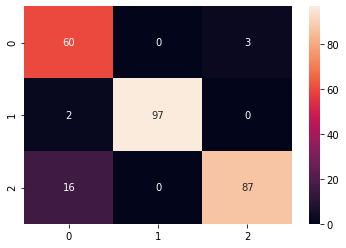

In [45]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50,30), alpha = 0.05,
                        max_iter = 150,activation = 'tanh', learning_rate = 'constant',
                        solver = 'adam')

mlp_clf.fit(x_learn, y_learn)
y_pred_mlp = mlp_clf.predict(x_eval)

cm = confusion_matrix(y_eval, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of MLP

In [46]:
print('Accuracy',accuracy_score((y_eval), y_pred_mlp) * 100)
print('Precision',precision_score(y_eval, y_pred_mlp, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_mlp, average='macro') * 100)

Accuracy 92.0754716981132
Precision 91.19658119658119
Recall 92.56130421178965


In [47]:
model_ev = pd.DataFrame({'Model': ['MLP Classifier','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [ accuracy_score((y_eval), y_pred_mlp) * 100,
                    nb_acc_score*100,accuracy_score((y_eval), y_predict_ranf) * 100,accuracy_score((y_eval), y_predict_knn)* 100,accuracy_score((y_eval), y_predict_dtree) * 100,accuracy_score((y_eval), y_predict_svc) * 100]})
model_ev

,Model,Accuracy
0,MLP Classifier,92.075472
1,Naive Bayes,91.320755
2,Random Forest,91.698113
3,K-Nearest Neighbour,99.245283
4,Decision Tree,99.622642
5,Support Vector Machine,99.245283


## Ensemble Learning 

In [35]:
from mlxtend.classifier import StackingCVClassifier

In [36]:
scv=StackingCVClassifier(classifiers=[dtree,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(x_learn, y_learn)
scv_predicted = scv.predict(x_eval)
scv_conf_matrix = confusion_matrix(y_eval, scv_predicted)
scv_acc_score = accuracy_score(y_eval, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_eval,scv_predicted))

confussion matrix
[[ 63   0   0]
 [  0  98   1]
 [  1   0 102]]


Accuracy of StackingCVClassifier: 99.24528301886792 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.99      0.99        99
           2       0.99      0.99      0.99       103

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265

